<a href="https://colab.research.google.com/github/Remon19/journey-into-ML/blob/main/cifar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import torch.cuda as cuda
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
import PIL as pil
import matplotlib.pyplot as plt


In [2]:
data_path = "/content/dataset/"
cifar10 = datasets.CIFAR10(data_path,train=True,download = True)
cifar10_va = datasets.CIFAR10(data_path,train=False,download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/dataset/cifar-10-python.tar.gz to /content/dataset/
Files already downloaded and verified


In [3]:
print(len(cifar10),len(cifar10_va),sep = ' , ')

50000 , 10000


In [8]:
img, label = cifar10[99]
print(img, label, )

<PIL.Image.Image image mode=RGB size=32x32 at 0x7F7668DC0790> 1


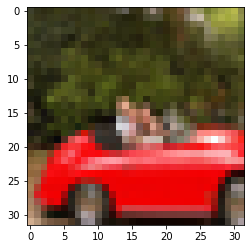

In [9]:
% matplotlib inline 
plt.imshow(img)

In [10]:
to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

torch.Size([3, 32, 32])

In [11]:
cifar10_t = datasets.CIFAR10(data_path, train = True, transform= to_tensor,download = False)
image_t, _ = cifar10_t[99]

In [ ]:
type(image_t)

torch.Tensor

In [12]:
image_t.shape , image_t.dtype

(torch.Size([3, 32, 32]), torch.float32)

In [13]:
imgs = torch.stack([img_t for img_t, _ in cifar10_t], dim = 3)

In [14]:
imgs.shape

torch.Size([3, 32, 32, 50000])

In [15]:
ch_mean =imgs.view(3, -1).mean(dim =1)
ch_stdev = imgs.view(3, -1).std(dim = 1)

In [16]:
ch_mean, ch_stdev

(tensor([0.4914, 0.4822, 0.4465]), tensor([0.2470, 0.2435, 0.2616]))

In [17]:
from torchvision.transforms.transforms import ToTensor
cifar10_t = datasets.CIFAR10(data_path, train = True, transform=transforms.Compose([transforms.ToTensor(),
                                                                                    transforms.Normalize(ch_mean,ch_stdev)]),
                             download = False)

In [18]:
cifar10_val = datasets.CIFAR10(data_path,train= False, download=False,
                               transform=transforms.Compose([transforms.ToTensor(),
                                                             transforms.Normalize(ch_mean,ch_stdev)]))

In [19]:

label_map= {0: 0, 2: 1}
class_names = ['airplane','bird']
cifar2 = [(img, label_map[label]) for 
           img, label in cifar10_t if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for
              img, label in cifar10_val if label in [0, 2]]          

In [20]:
len(cifar2), len(cifar2_val)

(10000, 2000)

In [ ]:
from torch.nn.modules.activation import Tanh
n_out = 2
model = nn.Sequential(
    nn.Linear(3072,1024),
    nn.Tanh(),
    nn.Linear(1024,512),
    nn.Tanh(),
    nn.Linear(512,128),
    nn.Tanh(),
    nn.Linear(128,n_out)
)

In [101]:
from torch.nn.modules.pooling import MaxPool2d
model2 =nn.Sequential(
    nn.Conv2d(3,16,kernel_size=5,padding=1),
    #nn.Dropout2d(p=0.4),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Conv2d(16,8,kernel_size=5,padding=1),
    #nn.Dropout2d(p=0.4),
    nn.ReLU(),
    nn.MaxPool2d(2),
    #nn.Conv2d(8,8,kernel_size=3,padding=1)
    nn.Flatten(1),
    nn.Linear(8 *6 *6  , 32),
    nn.ReLU(),
    nn.Linear(32 , 2)
)

In [109]:
loss_fn= nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = torch.optim.Adam(params=model2.parameters(),lr= learning_rate,weight_decay=.001,)
epochs = 100

In [110]:
train_loader = DataLoader(cifar2, batch_size = 64,
                          shuffle = True)

In [100]:
for imgs,_ in train_loader:
  print(imgs.shape)
  break;

torch.Size([64, 3, 32, 32])


In [111]:
for epoch in range(epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model2(imgs)
    loss = loss_fn(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print(f"Epoch:{epoch} , Loss:{loss}")


Epoch:0 , Loss:0.2290736436843872
Epoch:1 , Loss:0.05746883526444435
Epoch:2 , Loss:0.23048272728919983
Epoch:3 , Loss:0.09009259939193726
Epoch:4 , Loss:0.12030556797981262
Epoch:5 , Loss:0.15812581777572632
Epoch:6 , Loss:0.3899303376674652
Epoch:7 , Loss:0.18648941814899445
Epoch:8 , Loss:0.026783796027302742
Epoch:9 , Loss:0.06979406625032425
Epoch:10 , Loss:0.2611156404018402
Epoch:11 , Loss:0.15786512196063995
Epoch:12 , Loss:0.22828136384487152
Epoch:13 , Loss:0.11269145458936691
Epoch:14 , Loss:0.2932978570461273
Epoch:15 , Loss:0.04708544537425041
Epoch:16 , Loss:0.40430188179016113
Epoch:17 , Loss:0.06942829489707947
Epoch:18 , Loss:0.2468673288822174
Epoch:19 , Loss:0.022859986871480942
Epoch:20 , Loss:0.08934526145458221
Epoch:21 , Loss:0.06285246461629868
Epoch:22 , Loss:0.17137064039707184
Epoch:23 , Loss:0.041755374521017075
Epoch:24 , Loss:0.04336339607834816
Epoch:25 , Loss:0.06352914124727249
Epoch:26 , Loss:0.014609429985284805
Epoch:27 , Loss:0.05986256152391434
Epo

In [112]:
train_loader = DataLoader(cifar2, batch_size = 64,
                          shuffle = False)

In [113]:
correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model2(imgs.view([batch_size,3,32,32]))
    _, predictions = torch.max(outputs,dim =1)
    total += labels.shape[0]
    correct += int((predictions == labels).sum())

print(f"Accuracy:{correct/total}")

Accuracy:0.9995


In [114]:
val_loader = DataLoader(cifar2_val, batch_size = 64, shuffle = False)

In [115]:
correct = 0
total = 0

with torch.no_grad():
  for imgs, labels in val_loader:
    batch_size = imgs.shape[0]
    outputs = model2(imgs.view([batch_size,3, 32, 32]))
    _, predictions = torch.max(outputs,dim =1)
    total += labels.shape[0]
    correct += int((predictions == labels).sum())

print(f"Accuracy:{correct/total}")

Accuracy:0.8945
